In [1]:


import pandas as pd

from sklearn.naive_bayes import GaussianNB

In [2]:
base_risco_credito = pd.read_csv("risco_credito.csv")

In [3]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [4]:
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()
label_encoder_divida = LabelEncoder()
x_risco_credito[:,0]

array(['ruim', 'desconhecida', 'desconhecida', 'desconhecida',
       'desconhecida', 'desconhecida', 'ruim', 'ruim', 'boa', 'boa',
       'boa', 'boa', 'boa', 'ruim'], dtype=object)

In [7]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [8]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [1]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

NameError: name 'x_risco_credito' is not defined

In [10]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

<h1>naive bayes

In [11]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [12]:
#historia boa = 0, divida alta = 0, garantia nenhuma = 1, renda > 35 = 2
#historia ruim = 2, divida alta = 0, garantia adequada = 0, renda < 15 = 0
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [13]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [14]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [15]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [16]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

<h1>Base credit data


In [17]:
import pickle
with open('credit.pkl','rb') as f:
    x_credit_treinameto, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [18]:
x_credit_teste.shape , x_credit_treinameto.shape

((500, 3), (1500, 3))

In [19]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinameto, y_credit_treinamento)

GaussianNB()

In [20]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [21]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [25]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [26]:
from yellowbrick.classifier import ConfusionMatrix

0.938

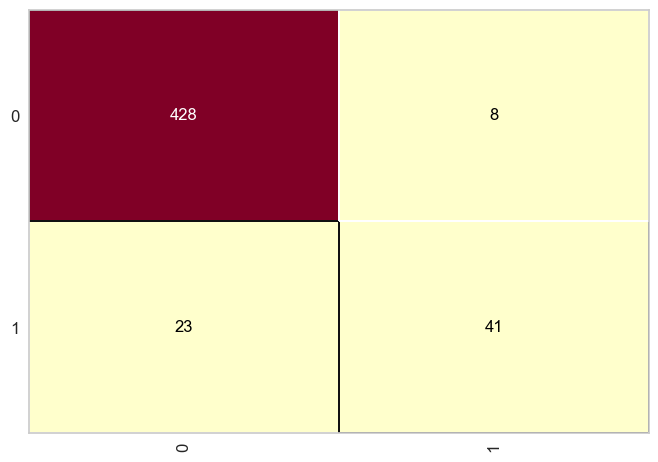

In [27]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinameto, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [28]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



<h1>Base Census

In [29]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [30]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [31]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [32]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [33]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [34]:
accuracy_score(y_census_teste, previsoes)

0.7950870010235415

0.7950870010235415

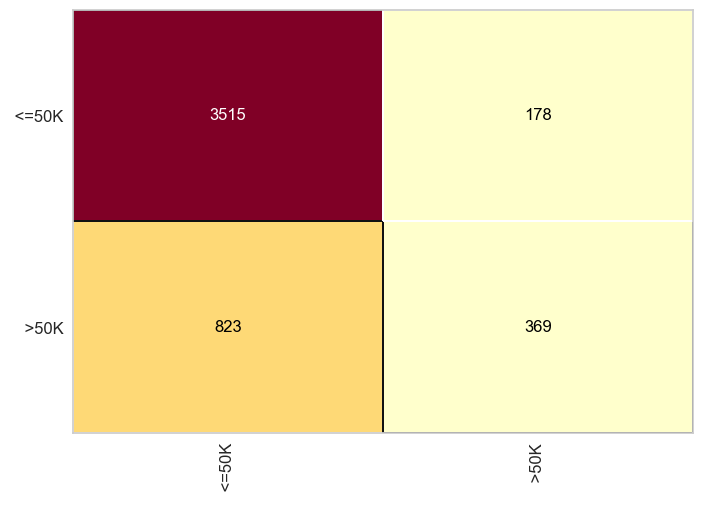

In [35]:
cm = ConfusionMatrix(naive_census)
cm.fit(y_census_treinamento, previsoes)
cm.score(x_census_teste, y_census_teste)

In [36]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      3693
        >50K       0.67      0.31      0.42      1192

    accuracy                           0.80      4885
   macro avg       0.74      0.63      0.65      4885
weighted avg       0.78      0.80      0.77      4885

